In [ ]:
### COMPUTATIONAL PHYSICS
### Homework 4: Welcome to the N-Body Problem

# You have the following system, two stars of equal mass orbit around their common
# center of mass a distance of 50 AU apart. A third star with mass of 1/2 that of 
# the inner two stars orbits the center of mass of the system with a pericenter 
# of 30 AU and a apocenter of 2000 AU. The orbit of the 3rd star is also inclined 
# relative to the plane of the inner two stars by 13 degrees. Do the calculation for 
# a clockwise and counterclockwise rotation for M1 and M2.

### Name:  Carson Huey-You

In [1]:
import math as math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:

#Use dxi/dt = vi, such that
#dxi/dt = vi
#dvi/dt = Sumj(G*Mj/dij)


In [3]:
def dr_dt(vel):
    
    # Note that this is only possible due to the extreme level of symmetry here:
    
    # dr/dt(Mi,x) = v(Mi, x)
    # dr/dt(Mi,y) = v(Mi, y)
    # dr/dt(Mi,z) = v(Mi, z)
    
    # Therefore, for any velocity component in any body, we should have:
    return vel


In [4]:
def dv_dt_M1(posM1, posM2, posM3):
    
    # Feed in Mi to get X, Y, Z at a certain time-step t.
    
    # 'Raycast' a vector from the position Mi to Mj.
    # Grab the vector and its magnitude.
    
    ray12_vec, ray12_mag = raycast(posM1, posM2)
    ray13_vec, ray13_mag = raycast(posM1, posM3)
    
    # Compute the unit-vectors.
    
    unit_ray12 = ray12_vec * (1/ray12_mag)
    unit_ray13 = ray13_vec * (1/ray13_mag)
    
    G = 39.478
    
    # Calculate the magnitudes of acceleration...
    
    acc12_mag = G*M[1]/(ray12_mag)**2
    acc13_mag = G*M[2]/(ray13_mag)**2
    
    # ...and scale the unit raycasted vector earlier to find the acceleration vector.
    
    acc12_vec = unit_ray12 * acc12_mag
    acc13_vec = unit_ray13 * acc13_mag
    
    # Finally, get the total acceleration by adding both vectors together.
    
    acc_totvec = acc12_vec + acc13_vec
    
    return acc_totvec


In [5]:
def dv_dt_M2(posM1, posM2, posM3):
    
    # Feed in Mi to get X, Y, Z at a certain time-step t.
    
    # 'Raycast' a vector from the position Mi to Mj.
    # Grab the vector and its magnitude.
    
    ray21_vec, ray21_mag = raycast(posM2, posM1)
    ray23_vec, ray23_mag = raycast(posM2, posM3)
    
    # Compute the unit-vector.
    
    unit_ray21 = ray21_vec * (1/ray21_mag)
    unit_ray23 = ray23_vec * (1/ray23_mag)
    
    G = 39.478
    
    # Calculate the magnitude of acceleration..
    
    acc21_mag = G*M[1]/(ray21_mag)**2
    acc23_mag = G*M[2]/(ray23_mag)**2
    
    # and scale the unit raycasted vector earlier to find the acceleration vector.
    
    acc21_vec = unit_ray21 * acc21_mag
    acc23_vec = unit_ray23 * acc23_mag
    
    # Finally, get the total acceleration by adding both vectors together.
    
    acc_totvec = acc21_vec + acc23_vec
    
    return acc_totvec


In [6]:
def dv_dt_M3(posM1, posM2, posM3):
    
    # Feed in Mi to get X, Y, Z at a certain time-step t.
    
    # 'Raycast' a vector from the position Mi to Mj.
    # Grab the vector and its magnitude.
    
    ray31_vec, ray31_mag = raycast(posM3, posM1)
    ray32_vec, ray32_mag = raycast(posM3, posM2)
    
    # Compute the unit-vector.
    
    unit_ray31 = ray31_vec * (1/ray31_mag)
    unit_ray32 = ray32_vec * (1/ray32_mag)
    
    G = 39.478
    
    # Calculate the magnitude of acceleration..
    
    acc31_mag = G*M[1]/(ray31_mag)**2
    acc32_mag = G*M[2]/(ray32_mag)**2
    
    # and scale the unit raycasted vector earlier to find the acceleration vector.
    
    acc31_vec = unit_ray31 * acc31_mag
    acc32_vec = unit_ray32 * acc32_mag
    
    # Finally, get the total acceleration by adding both vectors together.
    
    acc_totvec = acc31_vec + acc32_vec
    
    return acc_totvec


In [7]:
def raycast(posMi, posMj):
    
    ## Cast a ray, pointing from Mi to Mj.
    
    # Calculate the vector components
    ray_vec = np.array([posMj[0]-posMi[0], posMj[1]-posMi[1], posMj[2]-posMi[2]])
    
    # and magnitude here.
    ray_mag = np.linalg.norm(ray_vec)
    
    return ray_vec, ray_mag
    

In [8]:
def RK4(h, Func, P):
    
    k1 = h*Func(P)
    k2 = h*Func(P + 0.5*k1)
    k3 = h*Func(P + 0.5*k2)
    k4 = h*Func(P + k3)
    
    return (1/6)*(k1 + 2*k2 + 2*k3 + k4) #= x(t + h)


In [9]:
def RK4Arg(h, Func, arg1, arg2, arg3, iterarg):
    
    #An RK4 written to pass 3 arguments to a function.
    
    #Note here that, due to the return value of Func
    #k will become a 3-vector.
    
    k1 = h*Func(arg1, arg2, arg3)
    
    if iterarg == 'arg1':
        k2 = h*Func(arg1 + 0.5*k1, arg2, arg3)
        k3 = h*Func(arg1 + 0.5*k2, arg2, arg3)
        k4 = h*Func(arg1 + k3, arg2, arg3)
    
    if iterarg == 'arg2':
        k2 = h*Func(arg1, arg2 + 0.5*k1, arg3)
        k3 = h*Func(arg1, arg2 + 0.5*k2, arg3)
        k4 = h*Func(arg1, arg2 + k3, arg3)
        
    if iterarg == 'arg3':
        k2 = h*Func(arg1, arg2, arg3 + 0.5*k1)
        k3 = h*Func(arg1, arg2, arg3 + 0.5*k2)
        k4 = h*Func(arg1, arg2, arg3 + k3)
        
    #print(k1, k2, k3, k4)
    
    return (1/6)*(k1 + 2*k2 + 2*k3 + k4) #= x(t + h)



In [10]:
## Define an array with each mass, as well as certain distances.

M = np.array([1, 1, 0.5])

peric = 30
apoc = 2000

semimajor = (peric + apoc)/2

RoughM12 = M[0] + M[1] #The two masses are approximately in the same place at M3s apocenter.
T = np.sqrt(semimajor**3/(M[2] + RoughM12))

#print(T)

In [11]:
## Define timesteps, as well as the blank arrays for M1, M2 and M3.

tmin, tmax = 0., T
N = 10000

t = np.linspace(tmin, tmax, N+1)
h = (tmax - tmin)/N

M1 = np.zeros( shape = (len(t), 9) )
M2 = np.zeros( shape = (len(t), 9) )
M3 = np.zeros( shape = (len(t), 9) )

# Mi[k] will be at the kth time-step:

#  ##     X  Y  Z  Vx Vy Vz Ax Ay Az
#  Mi = [[0. 0. 0. 0. 0. 0. 0. 0. 0.]   ↓ First row is t=0
#        [.. .. .. .. .. .. .. .. ..]]  ↓ t increasing


In [12]:
# Define some k = G * Mi * Mj:
G = 39.478

k12 = G * M[0] * M[1]

# As M1 = M2, we know both velocities will be equal.  Therefore:

init_v12 = np.sqrt(k12/M[0]*25) #= init_v1 = init_v2

init_v3 = np.sqrt(G*M[2] * ((2/apoc) - (1/semimajor)))
#init_v3 = np.sqrt(2*G*RoughM12*M[2]/ * ((2/apoc) - (1/semimajor)))




In [22]:
### Set Initial Conditions for M1, M2, and M3.


##                X   Y     Z   Vx         Vy  Vz  Ax  Ay Az
M1[0] = np.array([0., 25., 0., -init_v12, 0., 0., 0., 0., 0.])
M2[0] = np.array([0., -25., 0., init_v12, 0., 0., 0., 0., 0.])

M3[0] = np.array([apoc*np.cos(np.radians(13)), 0., apoc*np.sin(np.radians(13)), 0., init_v3, 0., 0., 0., 0.])


In [23]:
#print(M1[0])
#print(M2[0])
#print(M3[0])

In [24]:
print("Completed iteration: ",end='')

for j in range(0, len(t)-1):
    
    print(str(j)+', ', end='')
    
    # First, slice position arrays by extracting the
    # X, Y, and Z part of each Mi.
    
    posM1 = M1[j][0:3]
    posM2 = M2[j][0:3]
    posM3 = M3[j][0:3]
    
    for Mi in (M1, M2, M3):
        
        # Define which function and posMi to run
        # the RK4 integration over.
        
        if np.array_equal(Mi, M1) == True:
            
            dvFunc = dv_dt_M1
            integ = 'arg1'
            
        if np.array_equal(Mi, M2) == True:
            
            dvFunc = dv_dt_M2
            integ = 'arg2'
            
        if np.array_equal(Mi, M3) == True:
            
            dvFunc = dv_dt_M3
            integ = 'arg3'
            
    
        ## For X, Y, Z:
        # RK4 operates individually, for each Mi and component x, y, or z.
        
        Mi[j+1][0] = Mi[j][0] + RK4(h, dr_dt, Mi[j][3])
        Mi[j+1][1] = Mi[j][1] + RK4(h, dr_dt, Mi[j][4])
        Mi[j+1][2] = Mi[j][2] + RK4(h, dr_dt, Mi[j][5])
        
        ## For Vx, Vy, Vz:
        # RK4Arg operates as a vector, returning a {Vx, Vy, Vz} for each Mi, all at once.
        
        Mi[j+1][3:6] = Mi[j][3:6] + RK4Arg(h, dvFunc, posM1, posM2, posM3, integ)
        
        ## For Ax, Ay, Az, we calculate directly from dv_dt for Mi
        Mi[j+1][6:9] = dvFunc(posM1, posM2, posM3)
        
        #print(Mi[j])
        
        

Completed iteration: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720

2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105

4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473

5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874

7088, 7089, 7090, 7091, 7092, 7093, 7094, 7095, 7096, 7097, 7098, 7099, 7100, 7101, 7102, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117, 7118, 7119, 7120, 7121, 7122, 7123, 7124, 7125, 7126, 7127, 7128, 7129, 7130, 7131, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145, 7146, 7147, 7148, 7149, 7150, 7151, 7152, 7153, 7154, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254

8479, 8480, 8481, 8482, 8483, 8484, 8485, 8486, 8487, 8488, 8489, 8490, 8491, 8492, 8493, 8494, 8495, 8496, 8497, 8498, 8499, 8500, 8501, 8502, 8503, 8504, 8505, 8506, 8507, 8508, 8509, 8510, 8511, 8512, 8513, 8514, 8515, 8516, 8517, 8518, 8519, 8520, 8521, 8522, 8523, 8524, 8525, 8526, 8527, 8528, 8529, 8530, 8531, 8532, 8533, 8534, 8535, 8536, 8537, 8538, 8539, 8540, 8541, 8542, 8543, 8544, 8545, 8546, 8547, 8548, 8549, 8550, 8551, 8552, 8553, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8564, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8588, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8601, 8602, 8603, 8604, 8605, 8606, 8607, 8608, 8609, 8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642, 8643, 8644, 8645

9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899, 9900, 9901, 9902, 9903, 9904, 9905, 9906, 9907, 9908, 9909, 9910, 9911, 9912, 9913, 9914, 9915, 9916, 9917, 9918, 9919, 9920, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9928, 9929, 9930, 9931, 9932, 9933, 9934, 9935, 9936, 9937, 9938, 9939, 9940, 9941, 9942, 9943, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958, 9959, 9960, 9961, 9962, 9963, 9964, 9965, 9966, 9967, 9968, 9969, 9970, 9971, 9972, 9973, 9974, 9975, 9976, 9977, 9978, 9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 

In [37]:
## Example slices - reading position, velocity & acceleration components.
#print(M1[:,0:3])
#print(M2[:,0:3])
#print(M1[:,3:6])
#print(M1[:,6:9])

[[ 0.00000000e+00  2.50000000e+01  0.00000000e+00]
 [-1.97643233e+02  2.50000000e+01  0.00000000e+00]
 [-3.95286405e+02  2.47966889e+01  1.42749483e-05]
 ...
 [-1.97597775e+06 -2.01236187e+03  8.05745670e-01]
 [-1.97617539e+06 -2.01256567e+03  8.05826343e-01]
 [-1.97637303e+06 -2.01276947e+03  8.05907015e-01]]
[[ 0.00000000e+00 -2.50000000e+01  0.00000000e+00]
 [ 1.97643233e+02 -2.50000000e+01  0.00000000e+00]
 [ 3.95286529e+02 -2.47966889e+01  1.42749483e-05]
 ...
 [ 1.97597840e+06  2.01507627e+03  5.62490709e+01]
 [ 1.97617603e+06  2.01528033e+03  5.62547032e+01]
 [ 1.97637367e+06  2.01548440e+03  5.62603355e+01]]
[[-3.14157604e+01  0.00000000e+00  0.00000000e+00]
 [-3.14157505e+01 -3.23166709e-02  2.26902964e-06]
 [-3.14152378e+01 -3.23805902e-02  3.99071574e-06]
 ...
 [-3.14148165e+01 -3.23939755e-02  1.28230462e-05]
 [-3.14148165e+01 -3.23939755e-02  1.28230462e-05]
 [-3.14148165e+01 -3.23939755e-02  1.28230462e-05]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.80714596

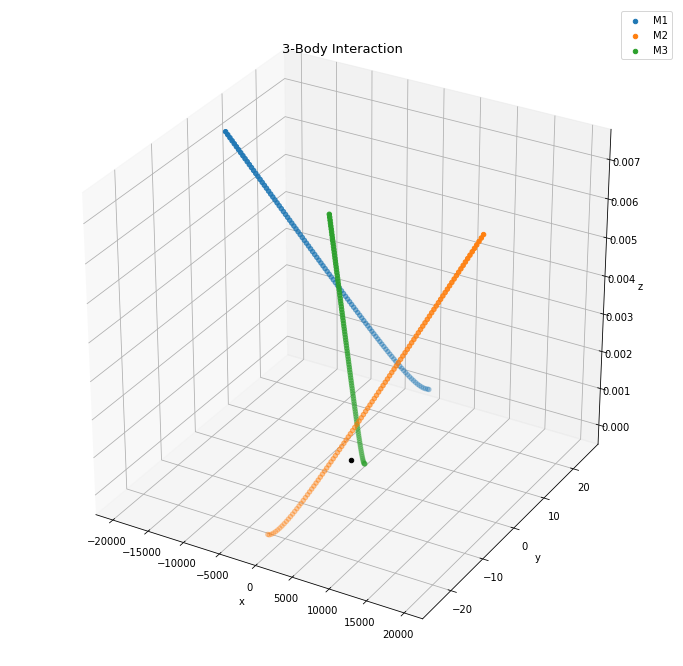

In [42]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

#plt.xticks([])
#plt.yticks([])

ax = fig.add_subplot(111, projection='3d')
ax.set_title("3-Body Interaction", size=13)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

show_max = 100

ax.scatter(0, 0, 0, color='k')
ax.scatter(M1[:show_max,0], M1[:show_max,1], M1[:show_max,2], label='M1')
ax.scatter(M2[:show_max,0], M2[:show_max,1], M1[:show_max,2], label='M2')
ax.scatter(M3[:show_max,0], M3[:show_max,1], M1[:show_max,2], label='M3')

ax.legend()
#ax.show()


In [18]:
## Example slice - Printing the Ax, Ay and Az for M1.
#print(M1[:,6:9])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.80714596e-06 -1.57912617e-02  1.10981709e-06]
 [ 2.50728492e-04 -3.12533490e-05  8.41834069e-07]
 ...
 [ 7.57476776e-12  1.04445548e-14  1.03384962e-15]
 [ 7.57325357e-12  1.04424776e-14  1.03352830e-15]
 [ 7.57173984e-12  1.04404009e-14  1.03320711e-15]]


In [19]:
## Save magnitudes of velocity and magnitude for each Mi.

M1_mags = np.zeros(shape=(len(t), 2))
M2_mags = np.zeros(shape=(len(t), 2))
M3_mags = np.zeros(shape=(len(t), 2))

for k in range(0, len(t)):
    M1_mags[k] = np.array( np.linalg.norm(M1[k,3:6]) , np.linalg.norm(M1[k,6:9]) )
    M2_mags[k] = np.array( np.linalg.norm(M2[k,3:6]) , np.linalg.norm(M2[k,6:9]) )
    M3_mags[k] = np.array( np.linalg.norm(M3[k,3:6]) , np.linalg.norm(M3[k,6:9]) ) 
    

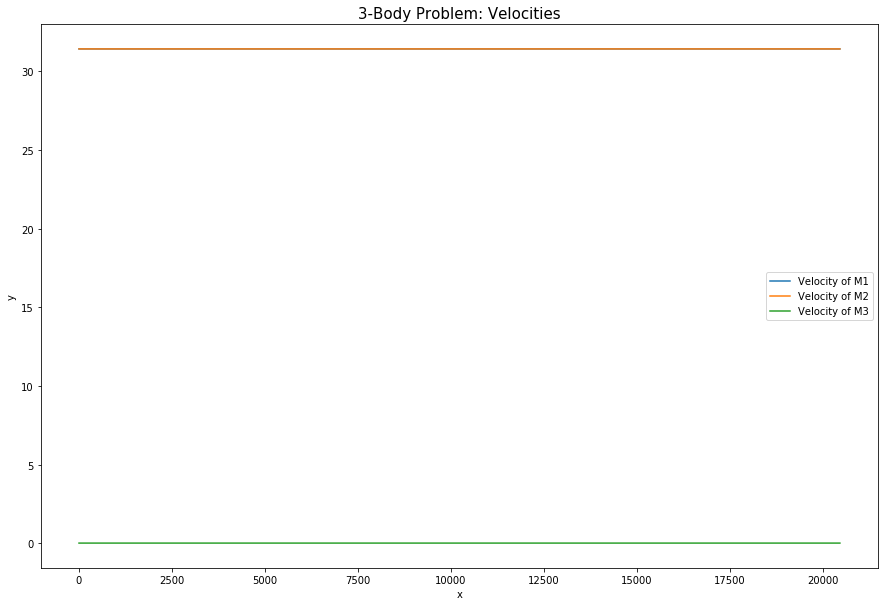

In [20]:
## Plot for Velocities computed earlier.

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

plt.title("3-Body Problem: Velocities", size=15)
#plt.xticks([])
#plt.yticks([])

plt.xlabel("x")
plt.ylabel("y") 

plt.plot(t, M1_mags[:,0], label='Velocity of M1')
plt.plot(t, M2_mags[:,0], label='Velocity of M2')
plt.plot(t, M3_mags[:,0], label='Velocity of M3')

plt.legend()
#ax.show()



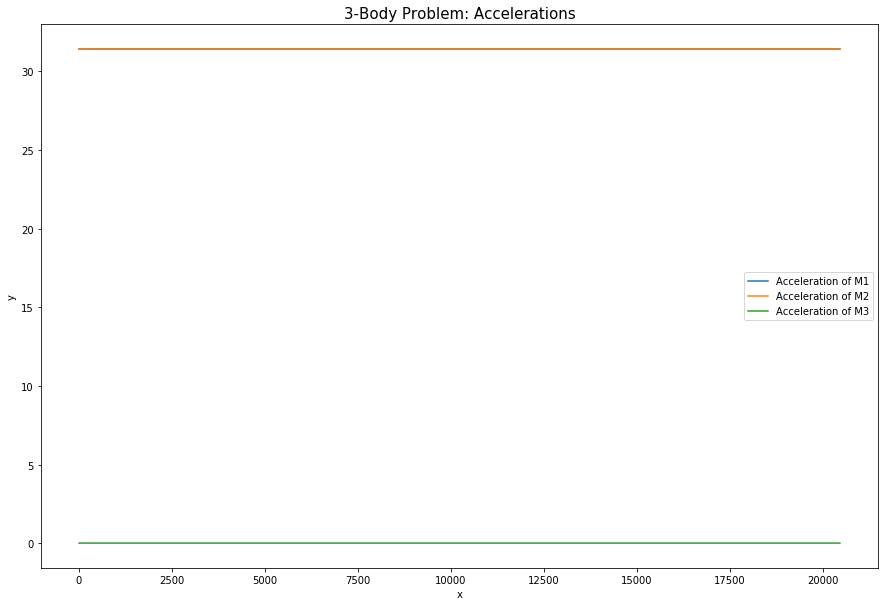

In [21]:
## Plot for Accelerations computed earlier.

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

plt.title("3-Body Problem: Accelerations", size=15)
#plt.xticks([])
#plt.yticks([])

plt.xlabel("x")
plt.ylabel("y") 

plt.plot(t, M1_mags[:,1], label='Acceleration of M1')
plt.plot(t, M2_mags[:,1], label='Acceleration of M2')
plt.plot(t, M3_mags[:,1], label='Acceleration of M3')

plt.legend()
#ax.show()